In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [7]:
from torch import nn, optim
import torch.nn.functional as F
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [10]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images=images.view(images.shape[0],-1)
        logps = model(images)
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        

Training loss: 0.3023908400713508
Training loss: 0.29331723778947455
Training loss: 0.2786254105823381
Training loss: 0.2775025620166935
Training loss: 0.265505581371375


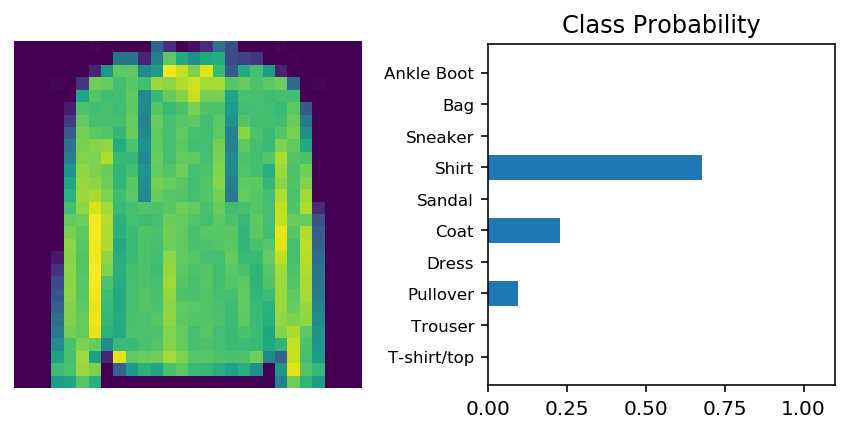

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1].view(1,784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

In [17]:
#Part 5 -Inference and validation
#another way of defining model

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1= nn.Linear(784,256)
        self.fc2= nn.Linear(256,128)
        self.fc3= nn.Linear(128,64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self,x):
        x= x.view(x.shape[0],-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.log_softmax(self.fc4(x),dim=1)
        
        return x

In [18]:
model = Classifier()

images,labels = next(iter(testloader))
ps= torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [19]:
top_p, top_class = ps.topk(1,dim=1)
# looks at most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[4],
        [4],
        [4],
        [4],
        [0],
        [4],
        [0],
        [4],
        [4],
        [4]])


In [25]:
#top_class is a2D tensor with shape (64,1) 
#labels is 1D with shape (64)
# we want top_class and labels with same shape
# equals below will have shape (64,64)
equals = top_class == labels
print(equals.shape)
print(labels.shape)

torch.Size([64, 64])
torch.Size([64])


In [26]:
equals = top_class == labels.view(*top_class.shape)

In [28]:
#to calculate the percentage of correct predictions
#equals will have either 0 or 1, so sum all values and divide by value
accuracy= torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 14.0625%


In [31]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr =0.003)

epochs = 30
steps = 0

train_losses, test_losses = [],[]
for e in range(epochs):
    running_loss= 0
    for images,labels in trainloader:
        optimizer.zero_grad()
        
        log_ps= model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss =0
        accuracy= 0
        
        with torch.no_grad():
            for images,labels in testloader:
                log_ps= model(images)
                test_loss += criterion(log_ps,labels)
                ps= torch.exp(log_ps)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.518..  Test Loss: 0.447..  Test Accuracy: 0.838
Epoch: 2/30..  Training Loss: 0.396..  Test Loss: 0.391..  Test Accuracy: 0.855
Epoch: 3/30..  Training Loss: 0.357..  Test Loss: 0.398..  Test Accuracy: 0.858
Epoch: 4/30..  Training Loss: 0.331..  Test Loss: 0.394..  Test Accuracy: 0.859
Epoch: 5/30..  Training Loss: 0.314..  Test Loss: 0.387..  Test Accuracy: 0.861
Epoch: 6/30..  Training Loss: 0.302..  Test Loss: 0.370..  Test Accuracy: 0.873
Epoch: 7/30..  Training Loss: 0.292..  Test Loss: 0.387..  Test Accuracy: 0.868
Epoch: 8/30..  Training Loss: 0.278..  Test Loss: 0.407..  Test Accuracy: 0.863
Epoch: 9/30..  Training Loss: 0.274..  Test Loss: 0.405..  Test Accuracy: 0.864
Epoch: 10/30..  Training Loss: 0.267..  Test Loss: 0.370..  Test Accuracy: 0.871
Epoch: 11/30..  Training Loss: 0.258..  Test Loss: 0.348..  Test Accuracy: 0.877
Epoch: 12/30..  Training Loss: 0.254..  Test Loss: 0.384..  Test Accuracy: 0.877
Epoch: 13/30..  Training Loss: 0.243.

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

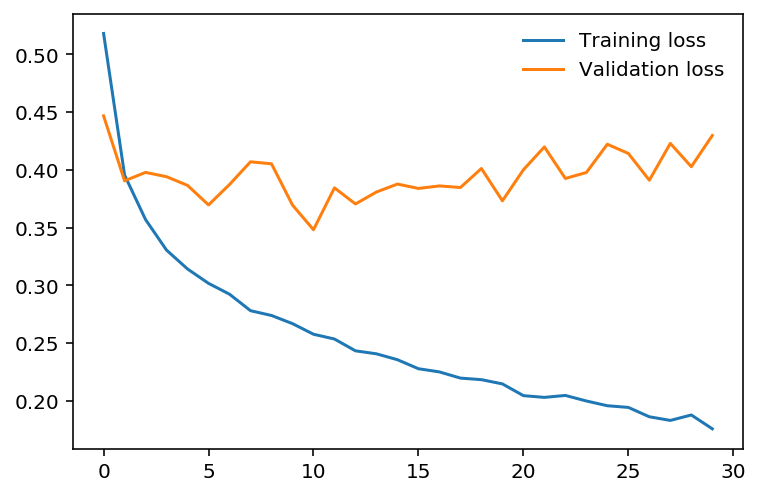

In [33]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

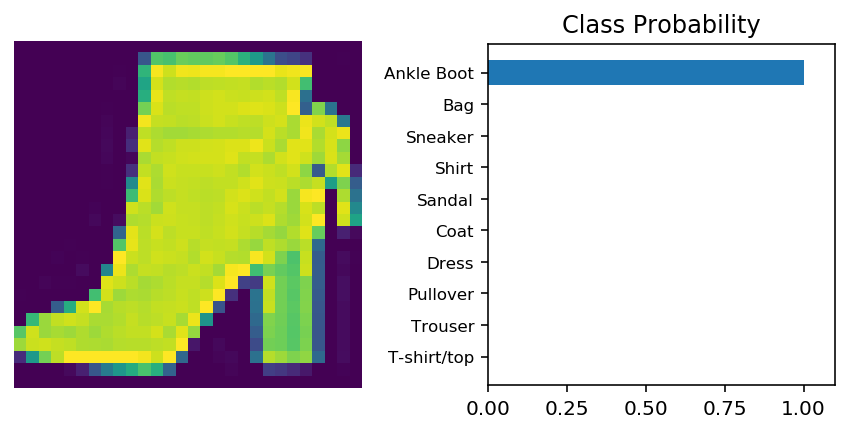

In [35]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]


img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')